In [1]:
import numpy as np
import matplotlib.pyplot as plt
from architecture.Model import Model
from dataloader.Dataloader import *
from train.Trainer import *
import torch
from munch import Munch

In [2]:
#argparser doesnt work for jupyter notebook
params = Munch({
    'img_size': 256,
    'num_domains': 2,
    'latent_dim': 16,
    'hidden_dim': 512,
    'batch_size': 8,
    'style_dim': 64,
    'eval_iter': 50,
    'save_iter': 250,
    'lambda_ds': 1.0,
    'resume_iter': 0,
    'max_iter': 1000,
    'mode': 'train',
    'lr': 1e-4,
    'f_lr': 1e-6,
    'beta1': 0.0,
    'beta2': 0.99,
    'weight_decay': 1e-2,
    'checkpoint_dir': '',
    'log_iter': 10
})

In [3]:
root = "../shared/stargan_folder/data/celeba_hq/train" #if gpu server
#Model,CopyModel = Model(params)

trainer = Trainer(params)

train_loader = get_loader(root, params.batch_size, params.img_size)
loaders = Munch(train=train_loader)

Initializing generator...
Initializing mapping_network...
Initializing style_encoder...
Initializing discriminator...


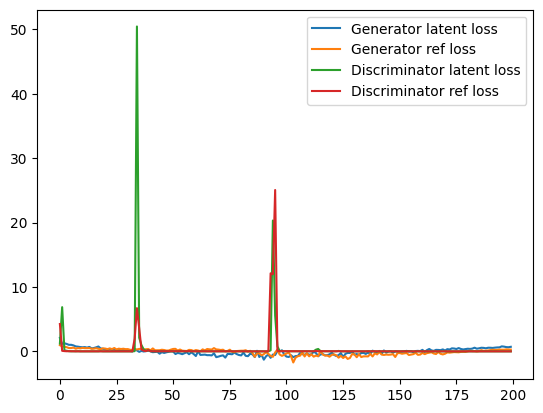

Checkpoint being saved at 000200_networs.cpt...
Checkpoint being saved at 000200__networs_copy.cpt...
Checkpoint being saved at 000200_optims.cpt...


In [4]:
trainer.train(loaders)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


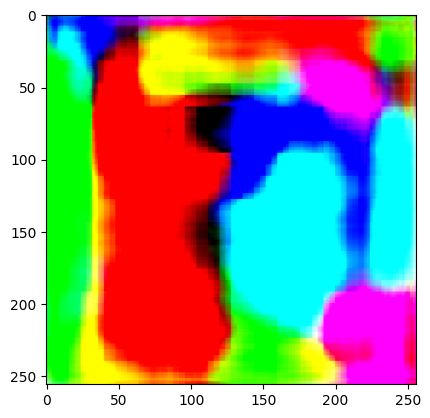

In [10]:
generator = trainer.networks.generator
mn = trainer.networks.mapping_network

train_fetcher=Fetcher(train_loader)
inputs = next(train_fetcher)
x_org,y_org = inputs.x, inputs.y
z1, z2 = inputs.z1, inputs.z2
x_ref1, x_ref2 = inputs.x_ref1, inputs.x_ref2
y_trg = inputs.y_trg

style = mn(z1,y_trg)
input_img=x_org

x_fake=generator(input_img,style)[0]

fake_img=torch.permute((x_fake+1)/2, [1,2,0]).cpu().detach().numpy()

plt.imshow(fake_img)
plt.show()
